# Porftolio Optimization Mix

## Import Libraries

In [1]:
#!pip install seaborn
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from datetime import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

%matplotlib inline

In [2]:
df_stocks = pd.read_csv('df_stocks.csv')

In [3]:
df_stocks['Date'] =  pd.to_datetime(df_stocks['Date'], format='%Y-%m-%d')

In [4]:
df_stocks.set_index('Date', inplace=True)

In [5]:
df_crypto = pd.read_csv('crypto_20_test.csv')

In [6]:
top_10_crypto = df_crypto.drop(['MONA', 'DGB', 'SC', 'BTS', 'BCN', 'MAID', 'DASH', 'FCT', 'NXT', 'DCR'], axis = 1)

In [7]:
top_10_crypto['Date'] =  pd.to_datetime(top_10_crypto['time'], format='%Y-%m-%d')

In [8]:
top_10_crypto.set_index('Date', inplace=True)

In [9]:
top_10_crypto = top_10_crypto[(top_10_crypto.index >= '2016-01-04')]

In [10]:
df_merge = pd.merge(df_stocks, top_10_crypto, left_index=True, right_index=True)

In [11]:
df_merge = df_merge.drop('time', axis = 1)

df_merge_1 = df_merge[(df_merge.index >= '2018-01-01') & (df_merge.index <= '2018-09-01')]

In [12]:
log_return_1 = np.log(df_merge_1/df_merge_1.shift(1))

In [13]:
log_return_1.mean() * len(log_return_1)

AAPL      0.291862
AMZN      0.529494
BRK-B     0.057011
FB       -0.032056
GOOGL     0.138643
JNJ      -0.012813
JPM       0.075727
MFST     -2.403820
V         0.255380
XOM      -0.028503
BTC      -0.746184
XRP      -1.889303
ETH      -1.125178
DOGE     -0.637880
LTC      -1.407776
BTB      -2.173885
BITCNY   -1.252336
XMR      -1.150373
BLOCK    -2.099577
XWC      -0.744328
dtype: float64

In [14]:
log_return_1.cov() * len(log_return_1)

AAPL      AMZN     BRK-B        FB     GOOGL       JNJ       JPM  \
AAPL    0.035867  0.018490  0.017097  0.019658  0.022789  0.010408  0.015386   
AMZN    0.018490  0.046430  0.017382  0.033505  0.027791  0.009066  0.018456   
BRK-B   0.017097  0.017382  0.031046  0.018984  0.024913  0.016480  0.025055   
FB      0.019658  0.033505  0.018984  0.104487  0.034297  0.010823  0.018687   
GOOGL   0.022789  0.027791  0.024913  0.034297  0.045009  0.017204  0.023384   
JNJ     0.010408  0.009066  0.016480  0.010823  0.017204  0.027068  0.014927   
JPM     0.015386  0.018456  0.025055  0.018687  0.023384  0.014927  0.031851   
MFST    0.072993  0.073304  0.041625  0.091449  0.050980  0.033047  0.027339   
V       0.019569  0.021738  0.019711  0.026724  0.026958  0.014054  0.018396   
XOM     0.011351  0.007946  0.016608  0.015710  0.019510  0.012684  0.013729   
BTC     0.012668  0.005176  0.013480  0.001801  0.011522  0.007767  0.022085   
XRP     0.029521  0.012467  0.027054  0.008737  0.020517  0.011534  0.037472   
ETH     0.016975  0.016170  0.028042  0.021092  0.030407  0.019561  0.038430   
DOGE    0.051060  0.040476  0.033342  0.026625  0.028786  0.013662  0.035020   
LTC     0.020700  0.010458  0.010705  0.011075  0.014534  0.000352  0.019351   
BTB     0.043923  0.022663  0.023980  0.075951  0.048881  0.009599  0.027581   
BITCNY  0.014741  0.017122  0.017603  0.019527  0.009282  0.007367  0.010433   
XMR     0.011653  0.001582  0.017073  0.006070  0.011016  0.007026  0.025613   
BLOCK   0.004404  0.018228  0.004861  0.009133  0.003424 -0.000416  0.012723   
XWC     0.028619  0.022186  0.033559  0.024508  0.026397  0.015357  0.032736   

            MFST         V       XOM       BTC       XRP       ETH      DOGE  \
AAPL    0.072993  0.019569  0.011351  0.012668  0.029521  0.016975  0.051060   
AMZN    0.073304  0.021738  0.007946  0.005176  0.012467  0.016170  0.040476   
BRK-B   0.041625  0.019711  0.016608  0.013480  0.027054  0.028042  0.033342   
FB      0.091449  0.026724  0.015710  0.001801  0.008737  0.021092  0.026625   
GOOGL   0.050980  0.026958  0.019510  0.011522  0.020517  0.030407  0.028786   
JNJ     0.033047  0.014054  0.012684  0.007767  0.011534  0.019561  0.013662   
JPM     0.027339  0.018396  0.013729  0.022085  0.037472  0.038430  0.035020   
MFST    6.384473  0.053744  0.010553  0.176123  0.425264  0.285701  0.386433   
V       0.053744  0.028071  0.015051  0.010846  0.022743  0.020952  0.041344   
XOM     0.010553  0.015051  0.029682  0.009428  0.025114  0.023860  0.023443   
BTC     0.176123  0.010846  0.009428  0.476440  0.556438  0.435237  0.585068   
XRP     0.425264  0.022743  0.025114  0.556438  1.206822  0.675483  0.945650   
ETH     0.285701  0.020952  0.023860  0.435237  0.675483  0.709016  0.640336   
DOGE    0.386433  0.041344  0.023443  0.585068  0.945650  0.640336  1.571415   
LTC     0.219725  0.013844  0.004581  0.436889  0.666641  0.537559  0.671070   
BTB     0.386147  0.037375  0.035042  0.435668  0.684174  0.652770  0.774993   
BITCNY  0.239712  0.021800  0.018366  0.411830  0.448173  0.343002  0.502462   
XMR     0.219573  0.004274  0.009589  0.526431  0.734288  0.630748  0.754758   
BLOCK   0.262961  0.006851  0.004749  0.514975  0.716714  0.597612  0.670949   
XWC     0.520732  0.024278  0.036360  0.496592  0.699032  0.562342  0.690458   

             LTC       BTB    BITCNY       XMR     BLOCK       XWC  
AAPL    0.020700  0.043923  0.014741  0.011653  0.004404  0.028619  
AMZN    0.010458  0.022663  0.017122  0.001582  0.018228  0.022186  
BRK-B   0.010705  0.023980  0.017603  0.017073  0.004861  0.033559  
FB      0.011075  0.075951  0.019527  0.006070  0.009133  0.024508  
GOOGL   0.014534  0.048881  0.009282  0.011016  0.003424  0.026397  
JNJ     0.000352  0.009599  0.007367  0.007026 -0.000416  0.015357  
JPM     0.019351  0.027581  0.010433  0.025613  0.012723  0.032736  
MFST    0.219725  0.386147  0.239712  0.219573  0.262961  0.520732  
V       0.013844  0.037375  0

In [15]:
np.random.seed(101)
num_of_ite_1 = 50000
all_weights_1 = np.zeros((num_of_ite_1,len(log_return_1.columns)))
port_return_1 = np.zeros(num_of_ite_1)
port_vol_1 = np.zeros(num_of_ite_1)
sharpe_ratio_1 = np.zeros(num_of_ite_1)

for i in range(num_of_ite_1):
    weights_1 = np.array(np.random.random(20))
    weights_1 = weights_1 / np.sum(weights_1)
    all_weights_1[i,:] = weights_1
    port_return_1[i] = np.sum((log_return_1.mean() * weights_1) *len(log_return_1))
    port_vol_1[i] = np.sqrt(np.dot(weights_1.T, np.dot(log_return_1.cov() * len(log_return_1), weights_1)))
    sharpe_ratio_1[i] = port_return_1[i]/port_vol_1[i]

### Distribution of Simulated Portfolios

Below we show the various portfolio profiles from the Monte Carlo simulation with their Expected Return, Expected Volatility and accompanying Sharpe Ratios.

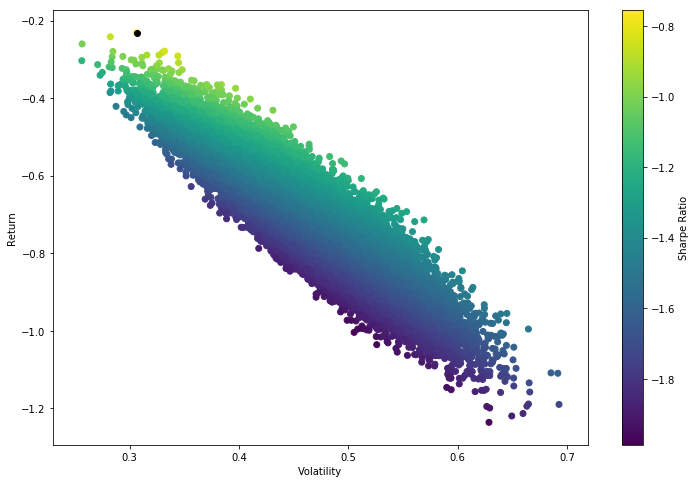

In [16]:
max_port_return_1 = port_return_1[sharpe_ratio_1.argmax()]
max_port_vol_1 = port_vol_1[sharpe_ratio_1.argmax()]


plt.figure(figsize=(12,8))
plt.scatter(x=port_vol_1,y=port_return_1,c=sharpe_ratio_1)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(x=max_port_vol_1,y=max_port_return_1,c='black')

## Mathematical Optimization for Asset Allocation

In [17]:
def get_ret_vol_sr(weights_1):
    weights_1 = np.array(weights_1)
    ret_1 = np.sum(log_return_1.mean() * weights_1) * len(log_return_1)
    vol_1 = np.sqrt(np.dot(weights_1.T, np.dot(log_return_1.cov() * len(log_return_1), weights_1)))
    sr_1 = ret_1/vol_1
    return np.array([ret_1,vol_1,sr_1])

### Maximum Sharpe Ratio

In [18]:
#def neg_sharpe(weights):
#    return  get_ret_vol_sr(weights)[2] * -1

In [19]:
#def check_sum(weights):
#    return np.sum(weights) - 1

In [20]:
#cons = ({'type':'eq','fun': check_sum})
#noa = len(log_return.columns)
#bounds = tuple((0, 1) for x in range(noa))
#init_guess = noa * [1. / noa,]
#opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [21]:
#opt_ret_vol_sr = pd.DataFrame(get_ret_vol_sr(opt_results.x).round(4)).T
#names = ['Return', 'Volatility', 'Sharpe Ratio']
#opt_ret_vol_sr.columns=names
#opt_ret_vol_sr

In [22]:
#optimal_sharpe = pd.DataFrame(opt_results['x'].round(4)).T
#optimal_sharpe.columns=list(log_return.columns)
#optimal_sharpe

### Alternative way to maximize Sharpe Ratio 

In [23]:
def statistics(weights_1):
    '''Returns portfolio statistics
    Parameters
    ==========
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights_1 = np.array(weights_1)
    pret_1 = np.sum(log_return_1.mean()*weights_1)*len(log_return_1)
    pvol_1 = np.sqrt(np.dot(weights_1.T,np.dot(log_return_1.cov()*len(log_return_1),weights_1)))
    return np.array([pret_1,pvol_1,pret_1/pvol_1])

In [24]:
import scipy.optimize as sco
def min_func_sharpe(weights_1):
    return statistics(weights_1)[2] * -1

In [25]:
#add constraint that all parameters (weights) add up to 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#add constraint that each parameter (weights) are within 0 and 1
noa = len(log_return_1.columns)
bnds = tuple((0, 1) for x in range(noa))
#starting parameter list (initial guesses for the weights)
x0 = noa * [1. / noa,]

In [26]:
opts_1 = sco.minimize(min_func_sharpe, x0, method='SLSQP', bounds=bnds, constraints=cons)

In [27]:
port_weights_1 = opts_1.x.round(4)

In [28]:
optimal_sharpe_1 = pd.DataFrame(opts_1['x'].round(4)).T
optimal_sharpe_1.columns=list(log_return_1.columns)
optimal_sharpe_1

AAPL    AMZN  BRK-B   FB  GOOGL  JNJ  JPM  MFST    V  XOM  BTC  XRP  ETH  \
0  0.2158  0.7842    0.0  0.0    0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   

   DOGE  LTC  BTB  BITCNY  XMR  BLOCK  XWC  
0   0.0  0.0  0.0     0.0  0.0    0.0  0.0

In [29]:
# Optimal shape for the first backtest
optimal_sharpe_out_1 = optimal_sharpe_1.transpose()
optimal_sharpe_out_1.sort_values(by=[0], ascending=False).head(5)

0
AMZN    0.7842
AAPL    0.2158
BLOCK   0.0000
XMR     0.0000
BITCNY  0.0000

In [30]:
optimal_ret_vol_sr_1 = pd.DataFrame(statistics(opts_1['x']).round(4)).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
optimal_ret_vol_sr_1.columns=names
optimal_ret_vol_sr_1

Return  Volatility  Sharpe Ratio
0  0.4782       0.191        2.5037

AAPL      AMZN     BRK-B        FB     GOOGL       JNJ  \
Date                                                                     
2018-09-04  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-09-05  0.993475  0.978088  1.010521  0.976747  0.989920  1.016004   
2018-09-06  0.976966  0.960187  1.013473  0.949579  0.977446  1.023557   
2018-09-07  0.969084  0.957127  1.018995  0.952559  0.972162  1.026922   
2018-09-10  0.956078  0.950723  1.024089  0.959219  0.970074  1.026099   

                 JPM      MFST         V       XOM       BTC       XRP  \
Date                                                                     
2018-09-04  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-09-05  0.995137  0.656250  0.965291  1.013327  0.909791  0.844128   
2018-09-06  0.990881  1.000000  0.977672  1.002117  0.884063  0.912228   
2018-09-07  0.992792  0.903125  0.968877  1.019180  0.870000  0.868039   
2018-09-10  0.987495  0.937500  0.974831  1.017686  0.858148  0.816283   

                 ETH      DOGE       LTC       BTB    BITCNY       XMR  \
Date                                                                     
2018-09-04  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-09-05  0.800302  0.943203  0.852985  0.946856  1.137042  0.830992   
2018-09-06  0.804684  0.952480  0.849439  0.693534  0.883989  0.848733   
2018-09-07  0.754268  1.015524  0.820774  0.713906  1.087517  0.802824   
2018-09-10  0.691162  1.325445  0.802896  0.663419  0.858209  0.766980   

               BLOCK       XWC  
Date                            
2018-09-04  1.000000  1.000000  
2018-09-05  0.846863  0.937228  
2018-09-06  0.843173  0.904098  
2018-09-07  0.828413  0.900610  
2018-09-10  0.773063  0.821534

Date
2018-11-01    850400.860967
Name: Total Pos, dtype: float64


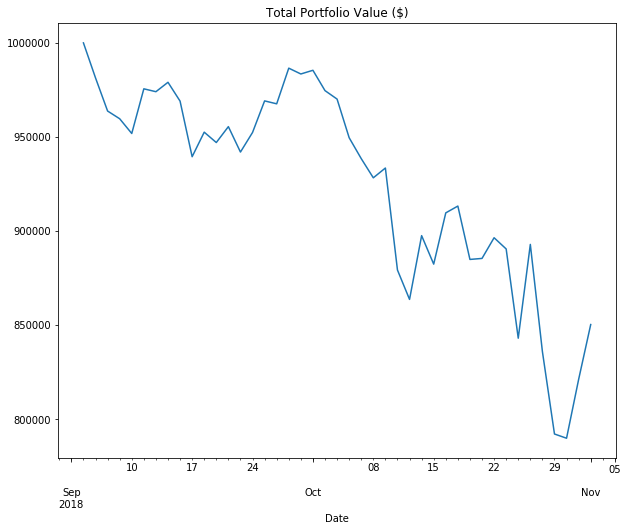

In [31]:
## Backtest 1
df_forecast_1 = df_merge[(df_merge.index >= '2018-09-01') & (df_merge.index <= '2018-11-01')]

df_returns = []

for elements in df_forecast_1:
    #print (elements)
    df_returns.append(df_forecast_1[elements]/ df_forecast_1.iloc[0][elements])

df = pd.DataFrame(df_returns)

df_norm = df.transpose()

display(df_norm.head())

# Assumed Deployed Capital: $1,000,000
# Calculate Return in $

df_alloc = []


for allocation in df_norm:
    
    df_alloc.append(df_norm[allocation] * optimal_sharpe_1.iloc[0][allocation])
    #df_norm['Position Values'] = stock_df['Allocation']*1000000

df_alloc = pd.DataFrame(df_alloc)

df_alloc = df_alloc.transpose() * 1000000

df_alloc.tail()

df_alloc['Total Pos'] = df_alloc.sum(axis = 1)

df_alloc.head()

df_alloc['Total Pos'].plot(figsize = (10, 8));
plt.title('Total Portfolio Value ($)');

print(df_alloc['Total Pos'].tail(1))

In [32]:
# restricting the dataset for Optimization 2
df_opt_2 = df_merge[(df_merge.index >= '2018-01-01') & (df_merge.index <= '2018-11-01')]
df_opt_2.tail()
log_return_2 = np.log(df_opt_2/df_opt_2.shift(1))

In [33]:
# Optimization 2
np.random.seed(101)
num_of_ite = 50000
all_weights_2 = np.zeros((num_of_ite,len(df_opt_2.columns)))
port_return_2 = np.zeros(num_of_ite)
port_vol_2 = np.zeros(num_of_ite)
sharpe_ratio_2 = np.zeros(num_of_ite)

for i in range(num_of_ite):
    weights = np.array(np.random.random(len(df_opt_2.columns)))
    weights = weights / np.sum(weights)
    all_weights_2[i,:] = weights
    port_return_2[i] = np.sum((log_return_2.mean() * weights) *len(log_return_2))
    port_vol_2[i] = np.sqrt(np.dot(weights.T, np.dot(log_return_2.cov() * len(log_return_2), weights)))
    sharpe_ratio_2[i] = port_return_2[i]/port_vol_2[i]

Text(0, 0.5, 'Expected Return')

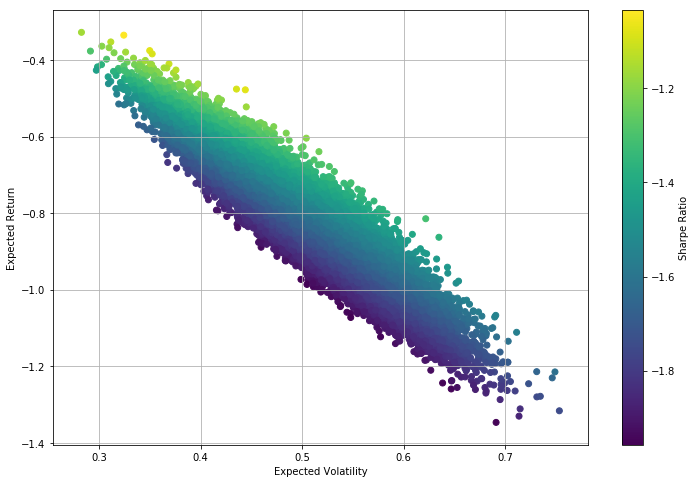

In [34]:
# Distribution of the simulated Portfolio (II)
max_port_return_2 = port_return_2[sharpe_ratio_2.argmax()]
max_port_vol_2 = port_vol_2[sharpe_ratio_2.argmax()]

plt.figure(figsize=(12,8))
plt.scatter(x=port_vol_2,y=port_return_2,c=sharpe_ratio_2)
plt.grid(True)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [35]:
def statistics(weights):
    '''Returns portfolio statistics
    Parameters
    ==========
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(log_return_2.mean()*weights)*len(log_return_2)
    pvol = np.sqrt(np.dot(weights.T,np.dot(log_return_2.cov()*len(log_return_2),weights)))
    return np.array([pret,pvol,pret/pvol])

In [36]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return statistics(weights)[2] * -1
#add constraint that all parameters (weights) add up to 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#add constraint that each parameter (weights) are within 0 and 1
noa = len(df_opt_2.columns)
bnds = tuple((0, 1) for x in range(noa))
#starting parameter list (initial guesses for the weights)
x0 = noa * [1. / noa,]

opts = sco.minimize(min_func_sharpe, x0, method='SLSQP',bounds=bnds, constraints=cons)


In [37]:
# Optimal shape for the second backtest
optimal_sharpe_2 = pd.DataFrame(opts['x'].round(4)).T
optimal_sharpe_2.columns=list(df_opt_2.columns)
optimal_sharpe_2

AAPL    AMZN  BRK-B   FB  GOOGL  JNJ  JPM  MFST    V  XOM  BTC  XRP  ETH  \
0  0.5984  0.4016    0.0  0.0    0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   

   DOGE  LTC  BTB  BITCNY  XMR  BLOCK  XWC  
0   0.0  0.0  0.0     0.0  0.0    0.0  0.0

In [38]:
# Optimal shape for the second backtest
optimal_sharpe_out = optimal_sharpe_2.transpose()
optimal_sharpe_out.sort_values(by=[0], ascending=False).head(5)

0
AAPL    0.5984
AMZN    0.4016
BLOCK   0.0000
XMR     0.0000
BITCNY  0.0000

In [39]:
# Optimal shape for the second backtest
optimal_ret_vol_sr = pd.DataFrame(statistics(opts['x']).round(4)).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
optimal_ret_vol_sr.columns=names
optimal_ret_vol_sr

Return  Volatility  Sharpe Ratio
0   0.296      0.2216        1.3353

AAPL      AMZN     BRK-B        FB     GOOGL       JNJ  \
Date                                                                     
2018-11-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-11-02  0.933669  1.000000  1.003449  0.990774  0.986657  0.999006   
2018-11-05  0.907164  0.977347  1.050423  0.979769  0.972145  1.009800   
2018-11-06  0.916974  0.986359  1.061449  0.988073  0.984889  1.012427   
2018-11-07  0.944784  1.054013  1.074711  0.998550  1.020498  1.027908   

                 JPM      MFST         V       XOM       BTC       XRP  \
Date                                                                     
2018-11-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-11-02  0.994494  2.436782  0.992544  1.015867  1.002094  0.999347   
2018-11-05  1.001009  2.229885  0.992686  1.012024  1.008218  1.087089   
2018-11-06  1.005689  1.609195  0.999716  1.016363  1.015423  1.203788   
2018-11-07  1.022940  2.758621  1.028048  1.029255  1.023252  1.171565   

                 ETH      DOGE       LTC       BTB    BITCNY       XMR  \
Date                                                                     
2018-11-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-11-02  1.011523  1.010702  1.021458  1.011321  1.002759  1.015366   
2018-11-05  1.055201  0.953015  1.065766  1.001887  0.892414  1.072819   
2018-11-06  1.104816  0.963717  1.113253  1.000000  0.899310  1.085990   
2018-11-07  1.096915  0.950144  1.074111  1.016981  1.123448  1.068047   

               BLOCK       XWC  
Date                            
2018-11-01  1.000000  1.000000  
2018-11-02  1.007673  0.958834  
2018-11-05  0.994885  0.984976  
2018-11-06  1.002558  0.981370  
2018-11-07  1.028133  1.028095

AAPL           AMZN  BRK-B   FB  GOOGL  JNJ  JPM  MFST  \
Date                                                                          
2018-11-30  410371.939983  346573.480732    0.0  0.0    0.0  0.0  0.0   0.0   
2018-12-03  424711.301241  363426.728236    0.0  0.0    0.0  0.0  0.0   0.0   
2018-12-04  406028.773289  342109.485248    0.0  0.0    0.0  0.0  0.0   0.0   
2018-12-06  401501.764585  348423.032658    0.0  0.0    0.0  0.0  0.0   0.0   
2018-12-07  387185.405493  334057.072175    0.0  0.0    0.0  0.0  0.0   0.0   

              V  XOM  BTC  XRP  ETH  DOGE  LTC  BTB  BITCNY  XMR  BLOCK  XWC  
Date                                                                          
2018-11-30  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     0.0  0.0    0.0  0.0  
2018-12-03  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     0.0  0.0    0.0  0.0  
2018-12-04  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     0.0  0.0    0.0  0.0  
2018-12-06  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     0.0  0.0    0.0  0.0  
2018-12-07  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     0.0  0.0    0.0  0.0

AAPL           AMZN  BRK-B   FB  GOOGL  JNJ  JPM  MFST  \
Date                                                                          
2018-11-01  508879.875203  341520.985764    0.0  0.0    0.0  0.0  0.0   0.0   
2018-11-02  475125.528285  341520.985764    0.0  0.0    0.0  0.0  0.0   0.0   
2018-11-05  461637.527702  333784.361449    0.0  0.0    0.0  0.0  0.0   0.0   
2018-11-06  466629.734186  336862.200480    0.0  0.0    0.0  0.0  0.0   0.0   
2018-11-07  480781.782070  359967.494682    0.0  0.0    0.0  0.0  0.0   0.0   

              V  XOM      ...        XRP  ETH  DOGE  LTC  BTB  BITCNY  XMR  \
Date                      ...                                                
2018-11-01  0.0  0.0      ...        0.0  0.0   0.0  0.0  0.0     0.0  0.0   
2018-11-02  0.0  0.0      ...        0.0  0.0   0.0  0.0  0.0     0.0  0.0   
2018-11-05  0.0  0.0      ...        0.0  0.0   0.0  0.0  0.0     0.0  0.0   
2018-11-06  0.0  0.0      ...        0.0  0.0   0.0  0.0  0.0     0.0  0.0   
2018-11-07  0.0  0.0      ...        0.0  0.0   0.0  0.0  0.0     0.0  0.0   

            BLOCK  XWC      Total Pos  
Date                                   
2018-11-01    0.0  0.0  850400.860967  
2018-11-02    0.0  0.0  816646.514050  
2018-11-05    0.0  0.0  795421.889151  
2018-11-06    0.0  0.0  803491.934666  
2018-11-07    0.0  0.0  840749.276752  

[5 rows x 21 columns]

Date
2018-12-07    721242.477668
Name: Total Pos, dtype: float64


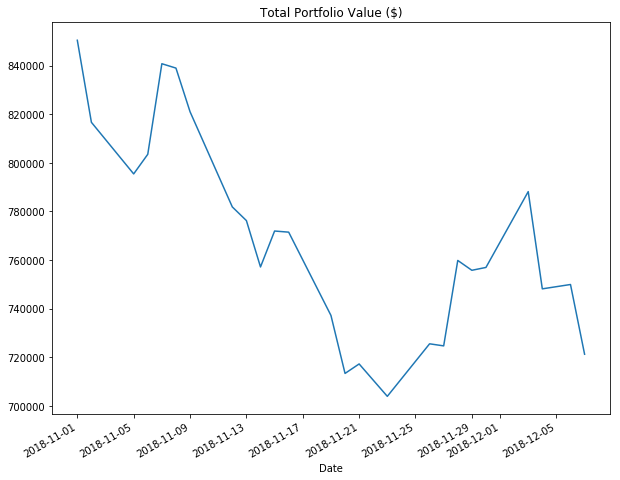

In [40]:
#new
#df_forecast_2 = df_stocks[(df_stocks.index >= '2018-05-01')]
df_forecast_2 = df_merge[(df_merge.index >= '2018-11-01') & (df_merge.index <= '2018-12-07')]

df_returns_2 = []

for elements in df_forecast_2:
    #print (elements)
    df_returns_2.append(df_forecast_2[elements]/ df_forecast_2.iloc[0][elements])


df = pd.DataFrame(df_returns_2)
df_norm_2 = df.transpose()
display(df_norm_2.head())

# Assumed Deployed Capital: $1,000,000
# Calculate Return in $

df_alloc_2 = []

for allocation in df_norm_2:
    
    df_alloc_2.append(df_norm_2[allocation] * optimal_sharpe_2.iloc[0][allocation])
    #df_norm['Position Values'] = stock_df['Allocation']*1000000

df_alloc_2 = pd.DataFrame(df_alloc_2)

total_value_1 = df_alloc['Total Pos'].iloc[-1]
total_value_1

df_alloc_2 = df_alloc_2.transpose() * total_value_1

display(df_alloc_2.tail())

df_alloc_2['Total Pos'] = df_alloc_2.sum(axis = 1)

display(df_alloc_2.head())

df_alloc_2['Total Pos'].plot(figsize = (10, 8));
plt.title('Total Portfolio Value ($)');

print(df_alloc_2['Total Pos'].tail(1))